In [50]:
# pandas is used for creating dataframe and managing it
# matplotlib and seaborn packages is used for  data visulazation
# sklearn contains preprogrammed machine learning algorithms
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [6]:
# this creates dataframe from csv file and gets top 5 data
df = pd.read_csv("milknew.csv")
df.head()


,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


In [8]:
df.describe()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,6.630123,44.226629,0.546742,0.432483,0.671388,0.491029,251.840415
std,1.399679,10.098364,0.498046,0.495655,0.469930,0.500156,4.307424
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,250.000000
50%,6.700000,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000


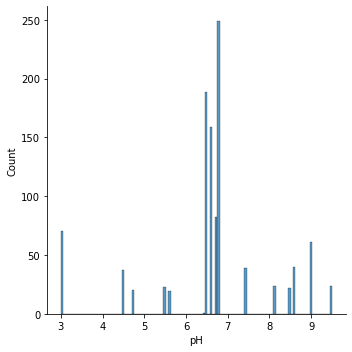

In [10]:
sb.displot(df['pH'])
plt.show()

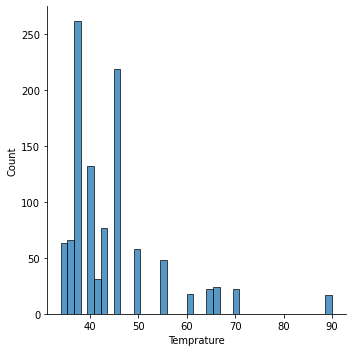

In [11]:
sb.displot(df['Temprature'])
plt.show()

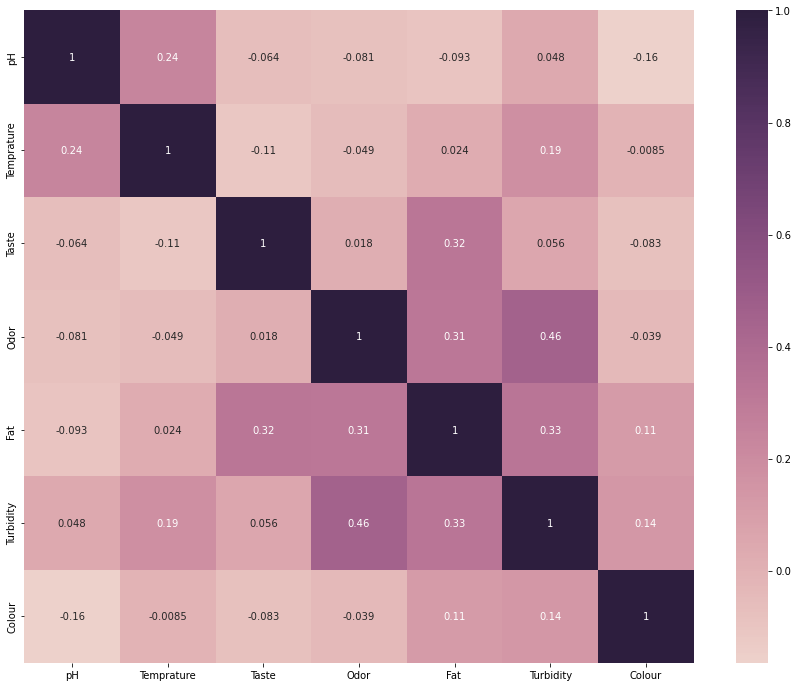

In [16]:
plt.figure(figsize=(15,12))
sb.heatmap(df.corr(),annot=True, cmap=sb.cubehelix_palette(as_cmap=True))
plt.show()

In [17]:
X = df.drop('Grade',axis=1).values #Independent Values
y = df[["Grade"]]  # Target Value

In [26]:
# Scaling all the independent values on the dataset by their effect ratio.
Ss = StandardScaler()
X = pd.DataFrame(Ss.fit_transform(X))
X.head()

,0,1,2,3,4,5,6
0,-0.021531,-0.914107,0.910503,-0.872962,0.699608,-0.982217,0.501600
1,-0.021531,-0.815035,-1.098294,1.145525,-1.429372,1.018105,0.269333
2,1.336564,2.553438,0.910503,1.145525,0.699608,1.018105,-1.356536
3,2.051351,-1.013180,0.910503,1.145525,-1.429372,1.018105,0.733867
4,-0.021531,-0.715962,-1.098294,-0.872962,-1.429372,-0.982217,0.733867


In [64]:
# Splitting the train and test dataframes.
# Train %80, Test %20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)
 
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(847, 7)
(847, 1)
(212, 7)
(212, 1)


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


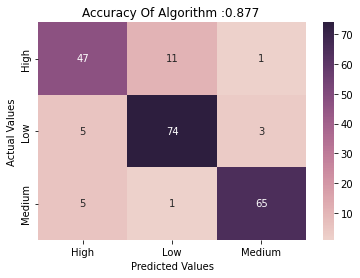

              precision    recall  f1-score   support

        high       0.82      0.80      0.81        59
         low       0.86      0.90      0.88        82
      medium       0.94      0.92      0.93        71

    accuracy                           0.88       212
   macro avg       0.88      0.87      0.87       212
weighted avg       0.88      0.88      0.88       212



In [65]:
Lr = LogisticRegression()
Lr.fit(X_train,y_train)
y_pred = Lr.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
score = accuracy_score(y_test,y_pred)

ax = sb.heatmap(cm,annot=True,fmt="",cmap=sb.cubehelix_palette(as_cmap=True))
ax.set_xlabel("Predicted Values")
ax.set_ylabel("Actual Values")
ax.set_xticklabels(["High","Low","Medium"])
ax.set_yticklabels(["High","Low","Medium"], rotation = 90, va = "center")
plt.title(f"Accuracy Of Algorithm :{round(score,3)} ")
plt.show()

print(sklearn.metrics.classification_report(y_test, y_pred))


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


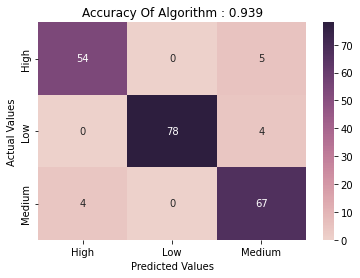

              precision    recall  f1-score   support

        high       0.93      0.92      0.92        59
         low       1.00      0.95      0.97        82
      medium       0.88      0.94      0.91        71

    accuracy                           0.94       212
   macro avg       0.94      0.94      0.94       212
weighted avg       0.94      0.94      0.94       212



In [66]:
svc = SVC()
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

score = accuracy_score(y_test,y_pred)

ax = sb.heatmap(cm,annot=True,fmt="",cmap=sb.cubehelix_palette(as_cmap=True))
ax.set_xlabel("Predicted Values")
ax.set_ylabel("Actual Values")
ax.set_xticklabels(["High","Low","Medium"])
ax.set_yticklabels(["High","Low","Medium"], rotation = 90, va = "center")
plt.title(f"Accuracy Of Algorithm : {round(score,3)}")
plt.show()

print(sklearn.metrics.classification_report(y_test, y_pred))

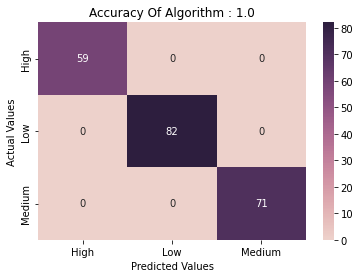

              precision    recall  f1-score   support

        high       1.00      1.00      1.00        59
         low       1.00      1.00      1.00        82
      medium       1.00      1.00      1.00        71

    accuracy                           1.00       212
   macro avg       1.00      1.00      1.00       212
weighted avg       1.00      1.00      1.00       212



In [67]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

score = accuracy_score(y_test,y_pred)

ax = sb.heatmap(cm,annot=True,fmt="",cmap=sb.cubehelix_palette(as_cmap=True))
ax.set_xlabel("Predicted Values")
ax.set_ylabel("Actual Values")
ax.set_xticklabels(["High","Low","Medium"])
ax.set_yticklabels(["High","Low","Medium"], rotation = 90, va = "center")
plt.title(f"Accuracy Of Algorithm : {round(score,3)}")
plt.show()

print(sklearn.metrics.classification_report(y_test, y_pred))

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


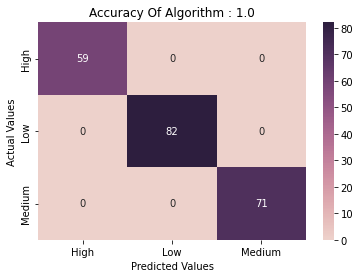

              precision    recall  f1-score   support

        high       1.00      1.00      1.00        59
         low       1.00      1.00      1.00        82
      medium       1.00      1.00      1.00        71

    accuracy                           1.00       212
   macro avg       1.00      1.00      1.00       212
weighted avg       1.00      1.00      1.00       212



In [68]:
GB = GradientBoostingClassifier()
GB.fit(X_train,y_train)
y_pred = GB.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
score = accuracy_score(y_test,y_pred)

ax = sb.heatmap(cm,annot=True,fmt="",cmap=sb.cubehelix_palette(as_cmap=True))
ax.set_xlabel("Predicted Values")
ax.set_ylabel("Actual Values")
ax.set_xticklabels(["High","Low","Medium"])
ax.set_yticklabels(["High","Low","Medium"], rotation = 90, va = "center")
plt.title(f"Accuracy Of Algorithm : {round(score,3)}")
plt.show()

print(sklearn.metrics.classification_report(y_test, y_pred))